In [0]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sb
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.svm import LinearSVC, SVC

In [0]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

In [3]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [7]:
mapa = { "mileage_per_year":"milhas_por_ano",
       "model_year":"ano",
       "price":"preco",
       "sold":"vendido"
}

dados = dados.rename(columns = mapa)
dados.head()

,Unnamed: 0,milhas_por_ano,ano,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [0]:
troca = {"yes":1 , "no":0}
dados.vendido = dados.vendido.map(troca)

In [10]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [0]:
from datetime import datetime
ano = datetime.today().year
dados['idade_do_modelo'] = ano - dados.ano

In [13]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


In [0]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

In [17]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,19,35085.22134
1,1,7843,1998,40557.96,1,21,12622.05362
2,2,7109,2006,89627.50,0,13,11440.79806
3,3,26823,2015,95276.14,0,4,43167.32682
4,4,7935,2014,117384.68,1,5,12770.11290


In [0]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano"], axis=1)

In [19]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,19,35085.22134
1,40557.96,1,21,12622.05362
2,89627.50,0,13,11440.79806
3,95276.14,0,4,43167.32682
4,117384.68,1,5,12770.11290


In [0]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

model = LinearSVC()
SEED = 5
np.random.seed(SEED)

raw_x_treino, raw_x_teste, y_treino, y_teste = train_test_split(x,y, stratify=y,test_size=0.25)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_treino)
x_treino = scaler.transform(raw_x_treino)
x_teste = scaler.transform(raw_x_teste)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [58]:
model.fit(x_treino, y_treino)
predict = model.predict(x_teste)
accuracy_score(predict, y_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5788

In [59]:
len(dados["vendido"])

10000

In [60]:
ones = np.ones(2500) #Estrategia do mais frequente
accuracy_score(ones, y_teste)

0.58

In [61]:
from sklearn.dummy import DummyClassifier #Estrategia do dummy que prevê de forma estratificada

dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

predict_dummy = dummy.predict(x_teste)
accuracy_score(predict_dummy, y_teste)

0.5244

In [62]:
model = SVC()
model.fit(x_treino, y_treino)
predict = model.predict(x_teste)
accuracy_score(predict, y_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.58

In [63]:
from sklearn.tree import DecisionTreeClassifier #nao precisa ajeitar escala pra funcionar bem

model = DecisionTreeClassifier(max_depth=2) #colocando essa profundidade apenas para ficar melhor de visualizar no gráfico
model.fit(raw_x_treino, y_treino)
predict = model.predict(raw_x_teste)
accuracy_score(predict, y_teste)

0.7684

In [46]:
!pip install graphviz==0.10

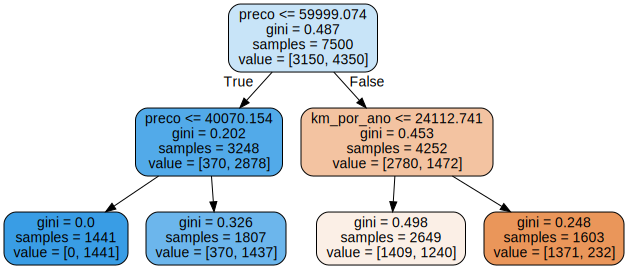

In [64]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns

dot_data = export_graphviz(model, feature_names = features, filled=True, rounded=True)#filled e rounded sao so frescura pra ficar bonito
grafico = graphviz.Source(dot_data)
grafico